Trix Strategy multicoins backtest<br>
Indicators: Trix, RSI Stoch<br>
SEG, 13.03.2022

In [25]:
import sys
sys.path.append( '../utilities' )
from data_engine import DataEngine
from backtesting import Backtesting
from custom_indicators import CustomIndocators as ci
import pandas as pd
import ta
import ccxt
import json
f = open('../database/pair_list.json',)
pairJson = json.load(f)
f.close()

In [26]:
pairList = pairJson['hitbtc2018']
#pairList = pairJson['NewftxClassicPair']
timeframe = '1h'
startDate = '2017-01-01T00:00:00'

dataEngine = DataEngine(session=ccxt.hitbtc())
#dataEngine = DataEngine(session=ccxt.ftx())

dfList = []
for pair in pairList:
    df = dataEngine.get_historical_from_db(pair, timeframe, startDate)
    dfList.append(df)

print("Data load 100%")
dfList[0]

Successfully load 43955 candles for BTCUSDT
Successfully load 42429 candles for ETHUSDT
Successfully load 42938 candles for LTCUSDT
Successfully load 34082 candles for ADAUSDT
Successfully load 38254 candles for TRXUSDT
Successfully load 39615 candles for ETCUSDT
Successfully load 23189 candles for ENJUSDT
Successfully load 37300 candles for XRPUSDT
Successfully load 41774 candles for ZECUSDT
Successfully load 41467 candles for DOGEUSDT
Successfully load 40992 candles for XTZUSDT
Successfully load 42440 candles for DASHUSDT
Successfully load 42360 candles for XMRUSDT
Successfully load 41150 candles for EOSUSDT
Successfully load 32146 candles for IOTAUSDT
Successfully load 41757 candles for XEMUSDT
Successfully load 30737 candles for QTUMUSDT
Successfully load 33168 candles for XLMUSDT
Successfully load 38552 candles for NEOUSDT
Successfully load 39985 candles for ZRXUSDT
Successfully load 30736 candles for OMGUSDT
Successfully load 34967 candles for XVGUSDT
Successfully load 38276 cand

,open,high,low,close,volume
timestamp,,,,,
2017-01-01 00:00:00,962.04,962.04,962.04,962.04,0.02000
2017-01-01 06:00:00,960.38,960.38,959.71,959.71,0.12000
2017-01-01 11:00:00,971.47,971.47,971.47,971.47,0.01000
2017-01-01 12:00:00,967.84,967.84,967.84,967.84,0.01000
2017-01-01 13:00:00,967.84,967.84,967.84,967.84,0.01000
...,...,...,...,...,...
2022-03-09 15:00:00,42219.46,42551.99,42101.01,42511.42,682.35762
2022-03-09 16:00:00,42518.39,42542.24,42141.54,42234.48,769.62032
2022-03-09 17:00:00,42232.83,42357.31,42105.51,42319.06,443.06242


In [27]:
# -- Indicator variable --
trixWindow = 9
trixSignal = 21
stochWindow = 14

# -- Drop all columns we do not need --
for df in dfList:
    df.drop(columns=df.columns.difference(['open','high','low','close','volume']), inplace=True)

    # -- Indicators, you can edit every value --
    trix = ci.trix(close=df['close'],trixLength=trixWindow, trixSignal=trixSignal)
    df['TRIX_HISTO'] = trix.trix_histo()

    df['STOCH_RSI'] = ta.momentum.stochrsi(close=df['close'], window=stochWindow)

print("Indicators loaded 100%")
dfList[0]

Indicators loaded 100%


,open,high,low,close,volume,TRIX_HISTO,STOCH_RSI
timestamp,,,,,,,
2017-01-01 00:00:00,962.04,962.04,962.04,962.04,0.02000,NaN,NaN
2017-01-01 06:00:00,960.38,960.38,959.71,959.71,0.12000,NaN,NaN
2017-01-01 11:00:00,971.47,971.47,971.47,971.47,0.01000,NaN,NaN
2017-01-01 12:00:00,967.84,967.84,967.84,967.84,0.01000,NaN,NaN
2017-01-01 13:00:00,967.84,967.84,967.84,967.84,0.01000,NaN,NaN
...,...,...,...,...,...,...,...
2022-03-09 15:00:00,42219.46,42551.99,42101.01,42511.42,682.35762,0.180917,0.816621
2022-03-09 16:00:00,42518.39,42542.24,42141.54,42234.48,769.62032,0.141547,0.000000
2022-03-09 17:00:00,42232.83,42357.31,42105.51,42319.06,443.06242,0.100978,0.076769


In [33]:
dfTestList = []
for df in dfList:
    dfTestList.append(df.loc['2019-01-01':])

# -- Starting value --
startingBalance = 1000
makerFee = 0
takerFee = 0.0006

# -- Rules --
StopLossActivation = False
takeProfitActivation = True
showLog = False

# -- Hyper parameters --
stochOverBought = 0.8
stochOverSold = 0.2
SlPct = 0.02
TpPct = 0.02
timeLimit = 17
maxPositions = 4

# -- Trade Functions --
# -- Condition to BUY market --
def buyCondition(row, previousRow=None):
    if (
        row['TRIX_HISTO'] >= 0
        and row['STOCH_RSI'] < stochOverBought
    ):
        return True
    else:
        return False

# -- Condition to SELL market --
def sellCondition(row, previousRow=None):
    if (
        row['TRIX_HISTO'] < 0
        and row['STOCH_RSI'] > stochOverSold
    ):
        return True
    else:
        return False

# -- Value initialisation --
usd = startingBalance
wallet = startingBalance
stopLoss = [0] * len(pairList)
takeProfit = [5000000] * len(pairList)
walletCoinArray = [0] * len(pairList)
walletUsdArray = [0] * len(pairList)
activePositions = 0
lastIndex = dfTestList[0].index.values[1]

# -- Definition of dfTrades, that will be the dataset to do your trades analyses --
dfTrades = None
dfTrades = pd.DataFrame(columns=['date', 'symbol','position', 'reason',
                                 'price', 'frais', 'fiat', 'coins', 'wallet'])

# # -- Iteration on all your price dataset (df) --
for index, row in dfTestList[0].iterrows():
    # -- Check if you have one coin in your wallet --
    if (walletCoinArray.count(0) == len(walletCoinArray)) == False:
        # -- Iteration on all coin (upgrade possible: only check coin in your wallet) --
        for i in range(0,len(dfTestList)):
            # -- Check if you have more than 0 coin --
            if walletCoinArray[i] != 0:
                try:
                    actualRow = dfTestList[i].loc[index]
                    previousRow = dfTestList[i].loc[lastIndex]
                    # -- Stop Loss --
                    if actualRow['low'] < stopLoss[i] :
                        sellPrice = stopLoss[i]
                        usd = usd + walletCoinArray[i] * sellPrice
                        fee = makerFee * walletCoinArray[i] * sellPrice
                        usd = usd - fee
                        # -- Set coin and equivalent usd to 0 after sold position --
                        walletCoinArray[i] = 0
                        walletUsdArray[i] = 0
                        activePositions -= 1

                        # -- LOG --
                        if showLog:
                            print("Sell COIN at Stop Loss", sellPrice, '$ the', index)

                        # -- Add the trade to dfTrades to analyse it later --
                        myrow = {
                            'date': index,
                            'symbol': pairList[i],
                            'position': "Sell",
                            'reason': 'Sell Stop Loss',
                            'price': sellPrice,
                            'frais': fee,
                            'fiat': usd,
                            'coins': 0,
                            'wallet': sum(walletUsdArray) + usd
                        }
                        dfTrades = dfTrades.append(myrow, ignore_index=True)

                    # -- Take Profit --
                    elif actualRow['high'] > takeProfit[i] :
                        sellPrice = takeProfit[i]
                        usd = usd + walletCoinArray[i] * sellPrice
                        fee = makerFee * walletCoinArray[i] * sellPrice
                        usd = usd - fee
                        # -- Set coin and equivalent usd to 0 after sold position --
                        walletCoinArray[i] = 0
                        walletUsdArray[i] = 0
                        activePositions -= 1

                        # -- LOG --
                        if showLog:
                            print("Sell COIN at Take Profit", sellPrice, '$ the', index)

                        # -- Add the trade to dfTrades to analyse it later --
                        myrow = {
                            'date': index,
                            'symbol': pairList[i],
                            'position': "Sell",
                            'reason': 'Sell Take Profit',
                            'price': sellPrice,
                            'frais': fee,
                            'fiat': usd,
                            'coins': 0,
                            'wallet': sum(walletUsdArray) + usd
                        }
                        dfTrades = dfTrades.append(myrow, ignore_index=True)

                    # -- Sell Market --
                    elif sellCondition(actualRow,previousRow):
                        sellPrice = actualRow['close']
                        usd = usd + walletCoinArray[i] * sellPrice
                        fee = takerFee * walletCoinArray[i] * sellPrice
                        usd = usd - fee
                        # -- Set coin and equivalent usd to 0 after sold position --
                        walletCoinArray[i] = 0
                        walletUsdArray[i] = 0
                        activePositions -= 1

                        # -- LOG --
                        if showLog:
                            print("Sell", pairList[i],"at", sellPrice, '$ the', index)

                        # -- Add the trade to DfTrades to analyse it later --
                        myrow = {
                            'date': index,
                            'symbol': pairList[i],
                            'position': "Sell",
                            'reason': 'Sell Market Order',
                            'price': sellPrice,
                            'frais': fee,
                            'fiat': usd,
                            'coins': 0,
                            'wallet': sum(walletUsdArray) + usd
                        }
                        dfTrades = dfTrades.append(myrow, ignore_index=True)
                except:
                    pass
    # -- Buy market order --
    # -- Check if you can open a new position --
    if activePositions < maxPositions:
        # -- Check buy condition for each coin of list --
        for i in range(0,len(dfTestList)):
            try:
                actualRow = dfTestList[i].loc[index]
                previousRow = dfTestList[i].loc[lastIndex]
                # -- Buy condition --
                if buyCondition(actualRow, previousRow) and activePositions < maxPositions and walletCoinArray[i]==0 :
                    buyPrice = actualRow['close']
                    # -- Define size of the position --
                    usdMultiplier = 1/(maxPositions-activePositions)
                    fee = takerFee * usd * usdMultiplier
                    usd = usd - fee
                    coin = (usd * usdMultiplier) / buyPrice
                    usd = usd - (usd * usdMultiplier)
                    # -- Set coin and equivalent usd to size of position after open position --
                    walletCoinArray[i] = coin
                    walletUsdArray[i] = coin * actualRow['close']
                    activePositions += 1
                    # -- Create a Stop Loss --
                    if StopLossActivation:
                        stopLoss[i] = buyPrice - SlPct * buyPrice
                    # -- Create a Take Profit --
                    if takeProfitActivation:
                        takeProfit[i] = buyPrice + TpPct * buyPrice

                    # -- LOG --
                    if showLog:
                        print("Buy", pairList[i],"at", buyPrice, '$ the', index)

                    # -- Add the trade to dfTrades to analyse it later --
                    myrow = {
                        'date': index,
                        'symbol': pairList[i],
                        'position': "Buy",
                        'reason': 'Buy Market Order',
                        'price': buyPrice,
                        'frais': fee,
                        'fiat': usd,
                        'coins': coin,
                        'wallet': sum(walletUsdArray) + usd
                    }
                    dfTrades = dfTrades.append(myrow, ignore_index=True)
            except:
                pass

    # -- Keep last index to define last row --            
    lastIndex = index

print("Final wallet", sum(walletUsdArray) + usd)


Final wallet 6712.570255964083


In [34]:
newDf.iloc[-2:]

,date,symbol,position,reason,price,frais,fiat,coins,wallet,resultat,resultat%,tradeIs,walletAth,drawDown,drawDownPct
date,,,,,,,,,,,,,,,
2022-03-09 18:00:00,2022-03-09 18:00:00,ENJ/USDT,Sell,Sell Take Profit,1.426633,0.000000,2.492994e+06,0.000000,9.770559e+06,48882.232713,0.502817,Good,3.459582e+07,2.482526e+07,0.717580
2022-03-09 18:00:00,2022-03-09 18:00:00,BTC/USDT,Buy,Buy Market Order,42019.060000,1495.796321,0.000000e+00,59.294474,9.769063e+06,NaN,NaN,,3.459582e+07,2.482675e+07,0.717623


In [35]:
BTobject = Backtesting()
newDf = BTobject.multi_spot_backtest_analys(dfTrades=dfTrades, dfTest=dfTestList[0], pairList=pairList, timeframe=timeframe)

Trading Bot on : 24 coins | Timeframe : 1h
Period : [2019-01-01 00:00:00] -> [2022-03-09 19:00:00]
Starting balance : 999.85 $

----- General Informations -----
Final balance : 6712.57 $
Performance vs US Dollar : 571.36 %
Bitcoin Buy and Hold Performence : 1034.62 %
Performance vs Buy and Hold : -40.83 %
Best trade : +0.54 %, the 2021-11-24 16:00:00
Worst trade : -8.26 %, the 2021-04-23 08:00:00
Worst drawDown : - 74.4 %
Total fees :  17499.04 $

----- Trades Informations -----
Total trades on period : 12823
Number of positive trades : 7756
Number of negative trades :  5067
Trades win rate ratio : 60.49 %
Average trades performance : 0.03 %
Average positive trades : 0.43 %
Average negative trades : -0.57 %

----- Trades Reasons -----
Buy Market Order     12827
Sell Market Order     6561
Sell Take Profit      6262
Name: reason, dtype: int64

----- Pair Result -----
-----------------------------------------------------------------------------------------------
Trades      Pair     Sum-r

----- 2019 Performances: -13.25% -----


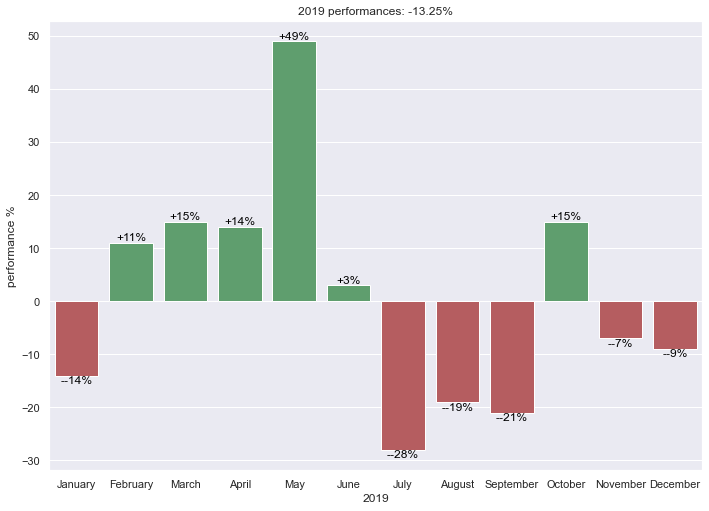

----- 2020 Performances: 268.44% -----


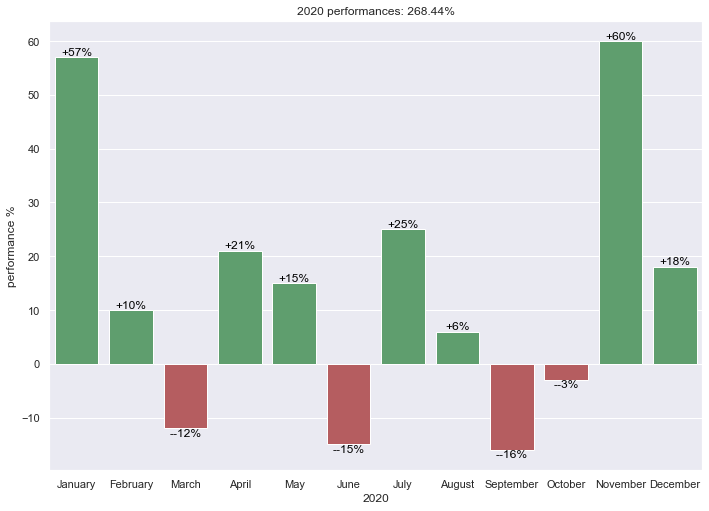

----- 2021 Performances: 258.41% -----


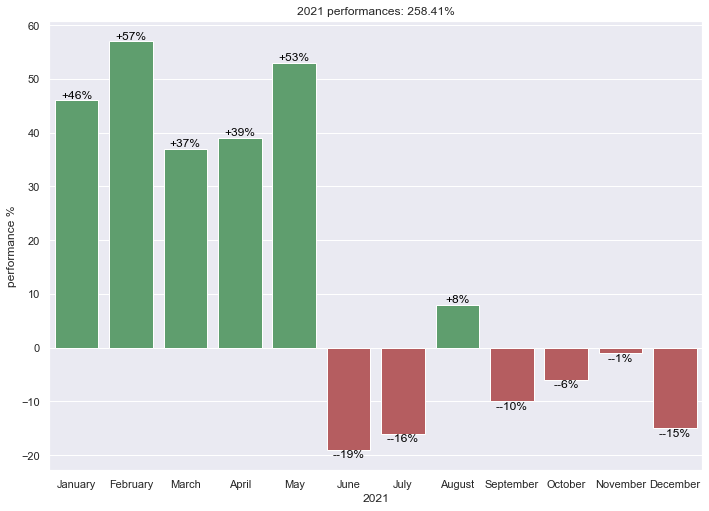

----- 2022 Performances: -41.45% -----


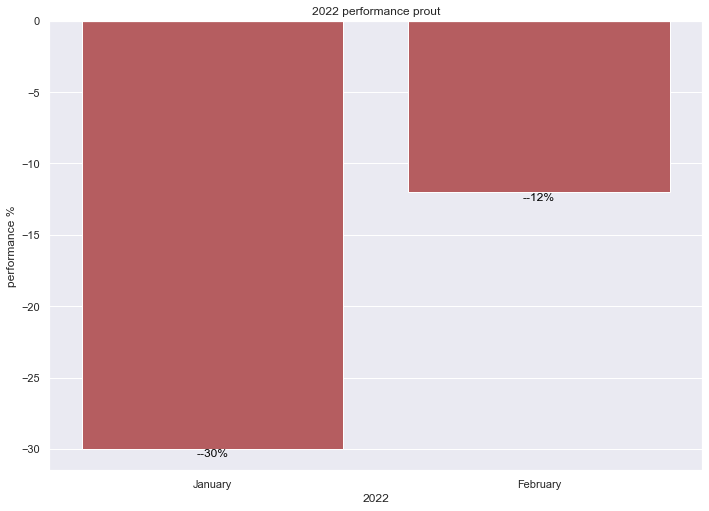

In [36]:
BTobject.plot_bar_by_month(dfTrades=dfTrades)

C:\Users\jacks\AppData\Local\Temp\ipykernel_27932\3056460112.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  BTobject.plot_wallet_evolution(dfTrades=newDf['2021'])



----- Wallet evolution -----


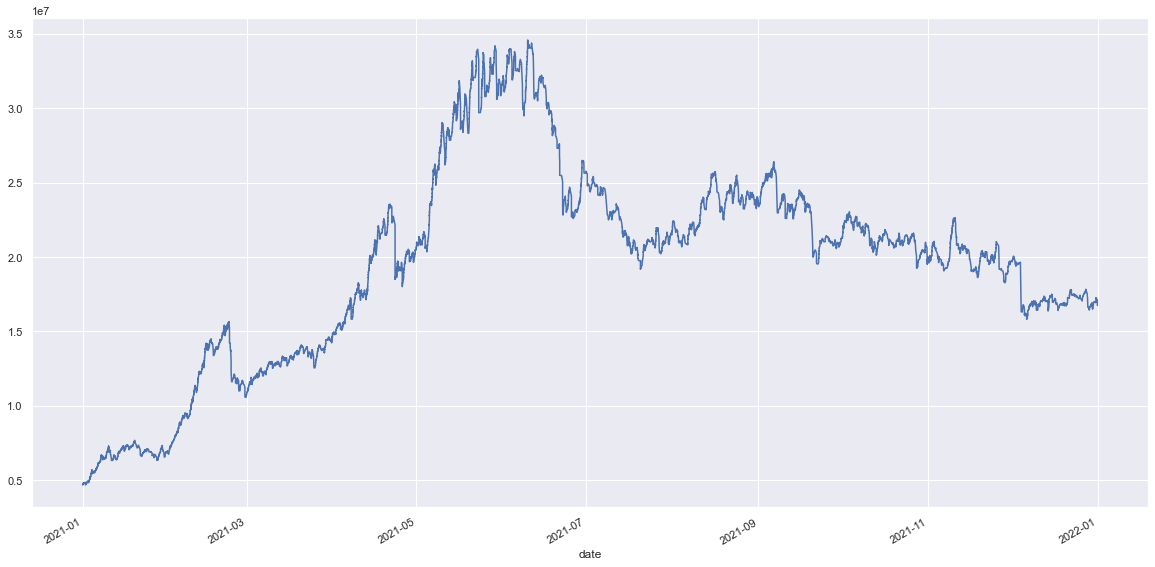

In [32]:
BTobject.plot_wallet_evolution(dfTrades=newDf['2021'])

In [56]:
dfTrades.iloc[-10:]

,date,symbol,position,reason,price,frais,fiat,coins,wallet
2973,2022-03-10 06:00:00,IMX/USD,Sell,Sell Market Order,1.547000,0.827754,1378.763016,0.000000,4012.912374
2974,2022-03-10 06:00:00,RUNE/USD,Buy,Buy Market Order,4.878000,0.827258,0.000000,282.479655,4012.085116
2975,2022-03-10 07:00:00,REN/USD,Sell,Sell Market Order,0.402750,0.816980,1360.816212,0.000000,4039.329105
2976,2022-03-10 08:00:00,LUNA/USD,Sell,Sell Market Order,96.370000,0.775038,2651.771757,0.000000,4029.707515
2977,2022-03-10 14:00:00,RUNE/USD,Sell,Sell Market Order,5.024000,0.851507,4070.098038,0.000000,4070.098038
2978,2022-03-11 04:00:00,LUNA/USD,Buy,Buy Market Order,95.540000,0.814020,2712.856013,14.197488,4069.284019
2979,2022-03-11 06:00:00,LUNA/USD,Sell,Sell Market Order,97.500000,0.830553,4096.280542,0.000000,4096.280542
2980,2022-03-11 23:00:00,RUNE/USD,Buy,Buy Market Order,5.675000,0.819256,2730.307524,240.555729,4095.461286
2981,2022-03-12 01:00:00,RUNE/USD,Sell,Sell Market Order,5.892500,0.850485,4146.931672,0.000000,4146.931672
2982,2022-03-12 11:00:00,XRP/USD,Buy,Buy Market Order,0.786525,0.829386,2764.068191,1757.139437,4146.102286
